In [6]:
from itertools import chain
import html
import ujson as json
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import StratifiedShuffleSplit

%matplotlib inline
sns.set(context='talk', font='monospaced')

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospaced'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


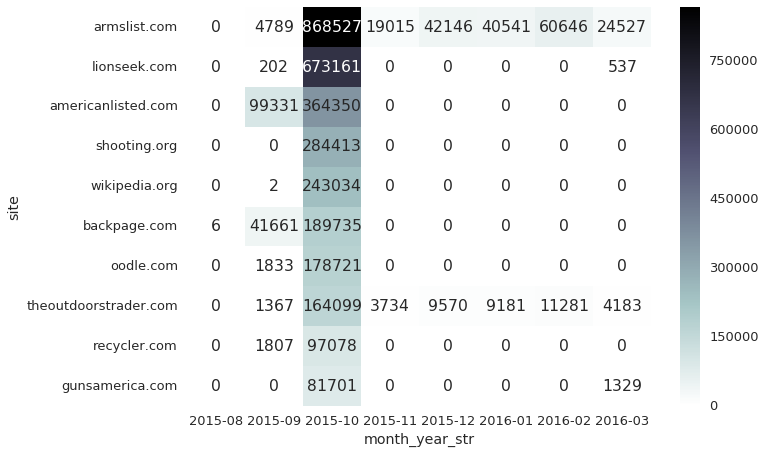

In [7]:
buckets = json.loads(open('../cdr_query_results/weapons_per_site_per_month.json', 'r').read())[
    'aggregations']['per_site']['buckets']

for site in buckets:
    site['ads_over_time'] = site['ads_over_time']['buckets']

for site in buckets:
    for site_bucket in site['ads_over_time']:
        site_bucket['site'] = site['key']

all_buckets = list(chain(*[site['ads_over_time'] for site in buckets]))
df = pd.DataFrame.from_records(all_buckets)
del df['key']
df['month_year'] = df.key_as_string.apply(
    lambda x: pd.to_datetime(x.split('T')[0]))
df['month_year_str'] = df['month_year'].astype(str).apply(lambda x: x[:7])
sns.heatmap(df.pivot('site', 'month_year_str', 'doc_count').fillna(
    0).astype(int).sort_values(['2015-10', '2015-09'], ascending=False), annot=True, fmt='d', cmap='bone_r')